# Selfish Trajectory Optimization

In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os
import sys
import numpy as np
from warnings import warn
sys.path.append(os.path.abspath('..'))
from cav_game.dynamics.car import BicycleDynamics
from cav_game.maneuvers.selfish import SelfishManeuver, SelfishManeuverRK4

### 1. Define Parameters

In [17]:
file_name = ''
# Vehicle i initial conditions
x0 = 0       # Vehicle i initial x position [m]
v0 = 23      # Vehicle i initial velocity [m/s]
X0 = np.array([x0, v0])
# Obstacle i initial conditions
x0_obst = 50 # Obstacle i initial x position [m]
v0_obst = 16  # Obstacle i initial velocity [m/s]
X0_obst = np.array([x0_obst, v0_obst])
# Obstacle location descriptor
obstacles = {"front": X0_obst}
# Construct optimization parameters
maneuver_params = {"cav_type":"CAVC",
                   "n":200,
                   "display_solver_output": True,
                   "diff_method":'dae.finite_difference',
                   "alpha_time":0.01,
                   "alpha_speed":0.98}
# Construct vehicle model
veh_params = {}
cav_model = BicycleDynamics(veh_params)
# Construct maneuver
long_maneuver_continuous = SelfishManeuver(cav_model, x0 =  X0, x0_obst=obstacles, params = maneuver_params)
long_maneuver_discrete = SelfishManeuverRK4(cav_model, x0 =  X0, x0_obst=obstacles, params = maneuver_params)


### 3. Compute CAVC Trajectory

Ipopt 3.14.6: acceptable_obj_change_tol=1e-08
max_iter=10000
acceptable_tol=1e-08
print_level=3


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Total number of variables............................:     1806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      602
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1604
Total number of inequality constraints...............:      201
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
    

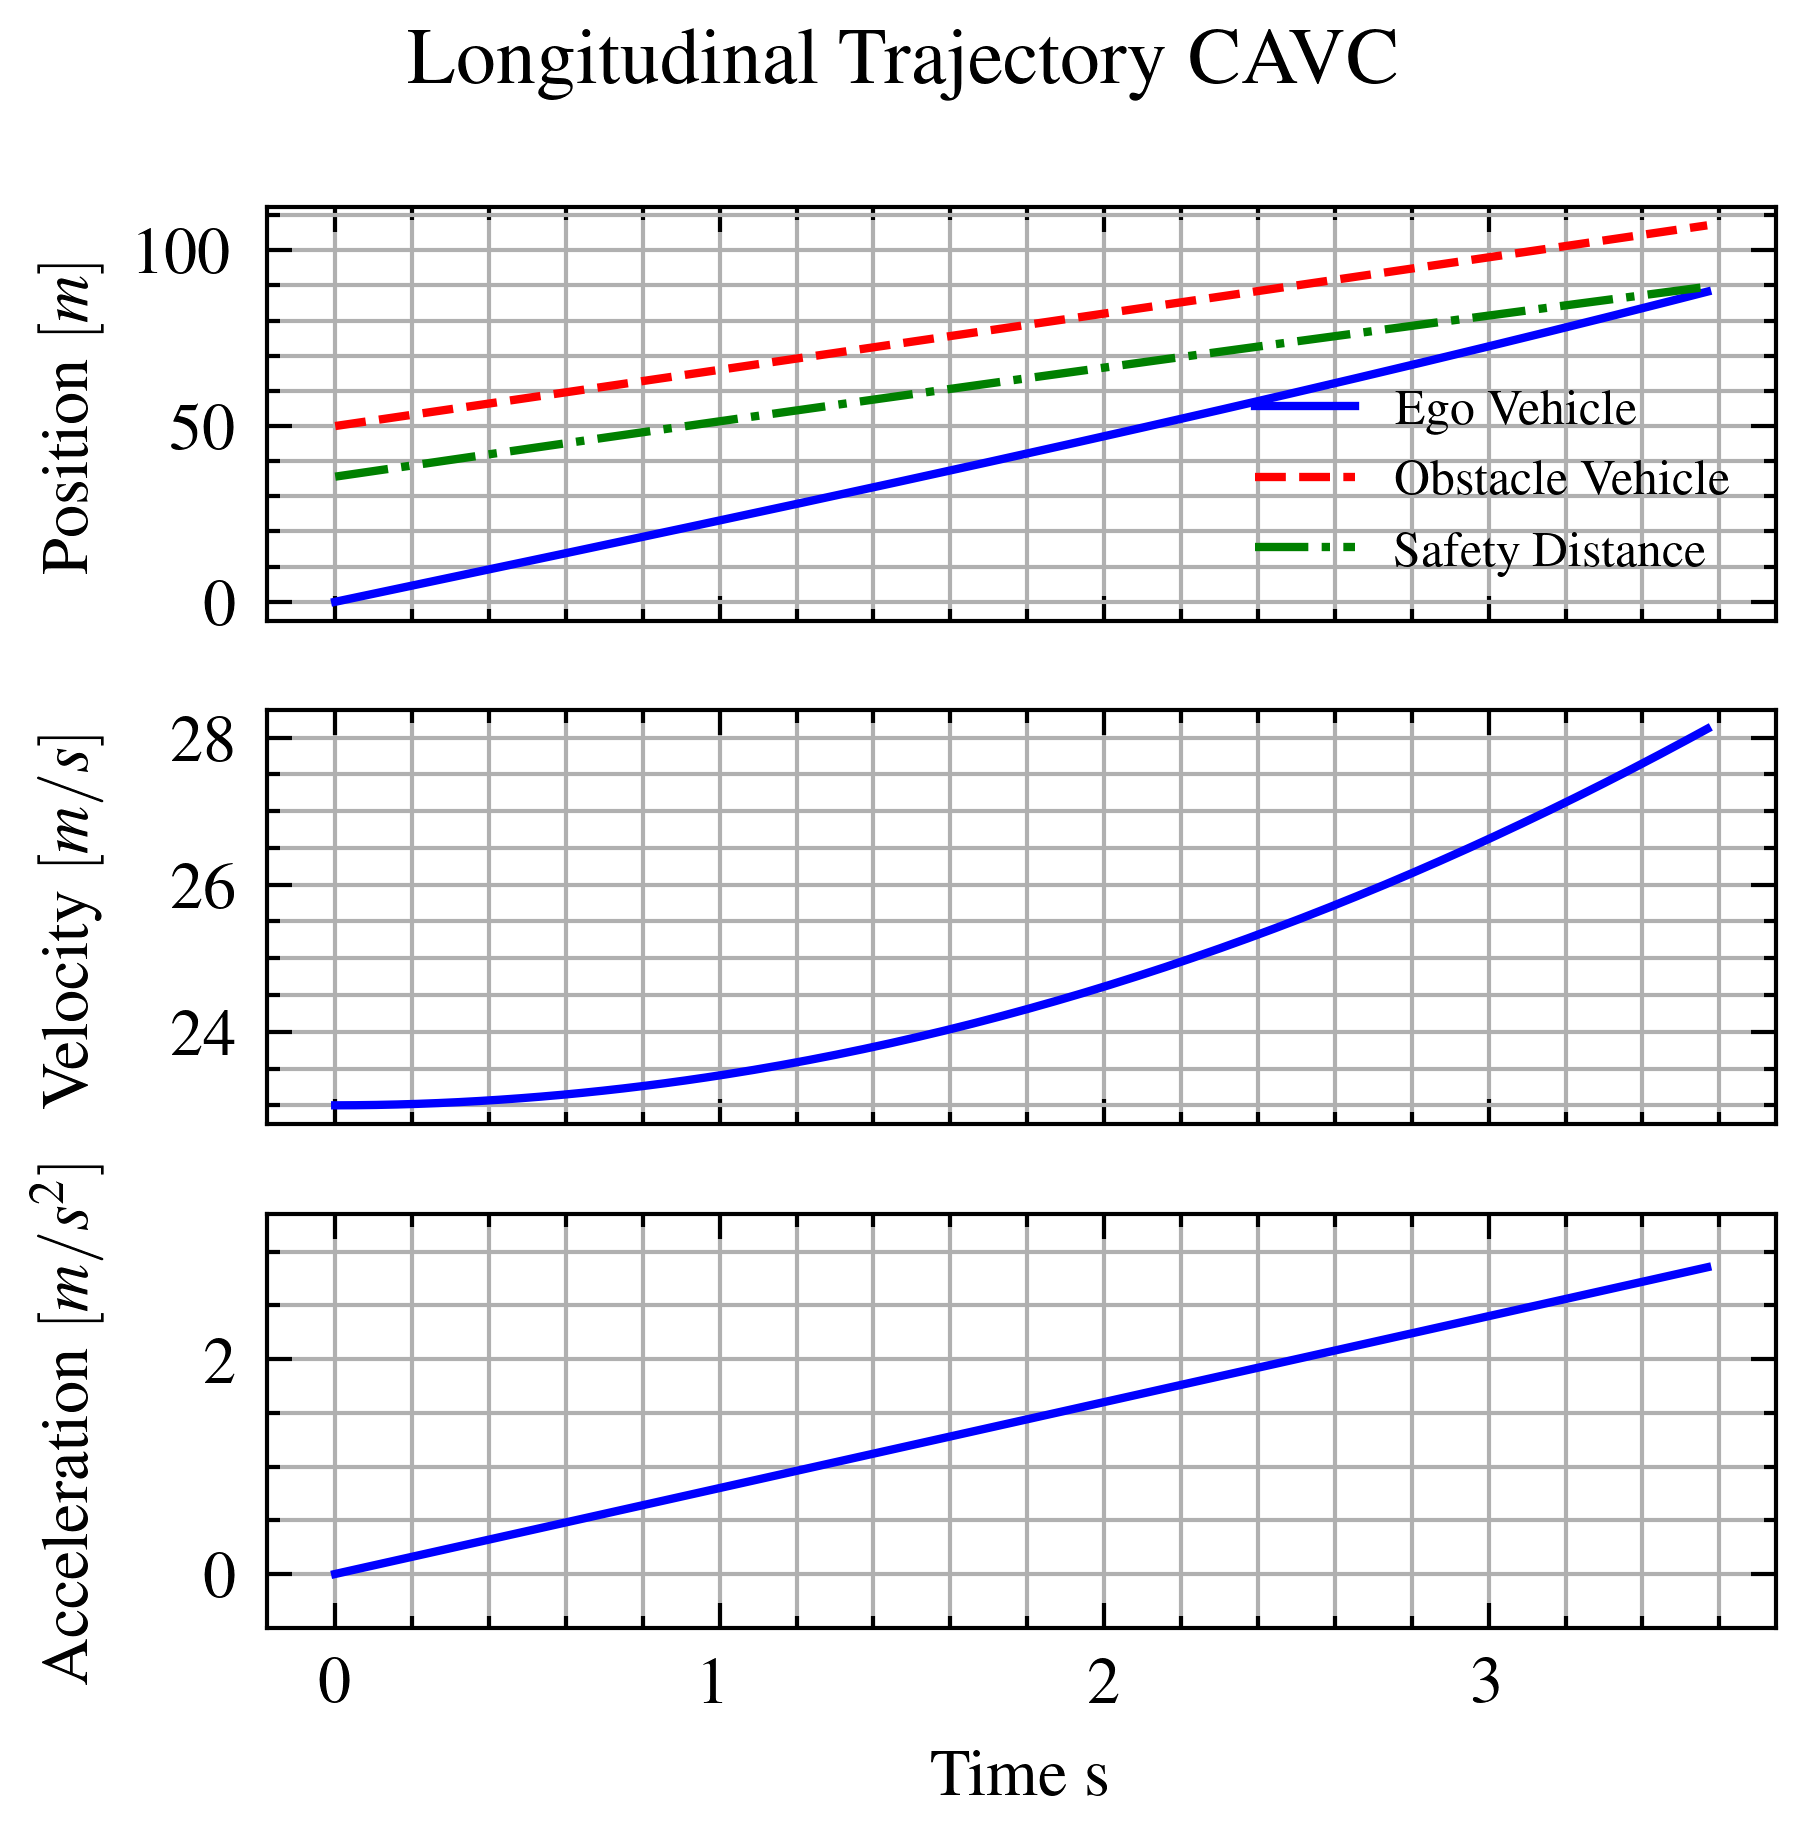

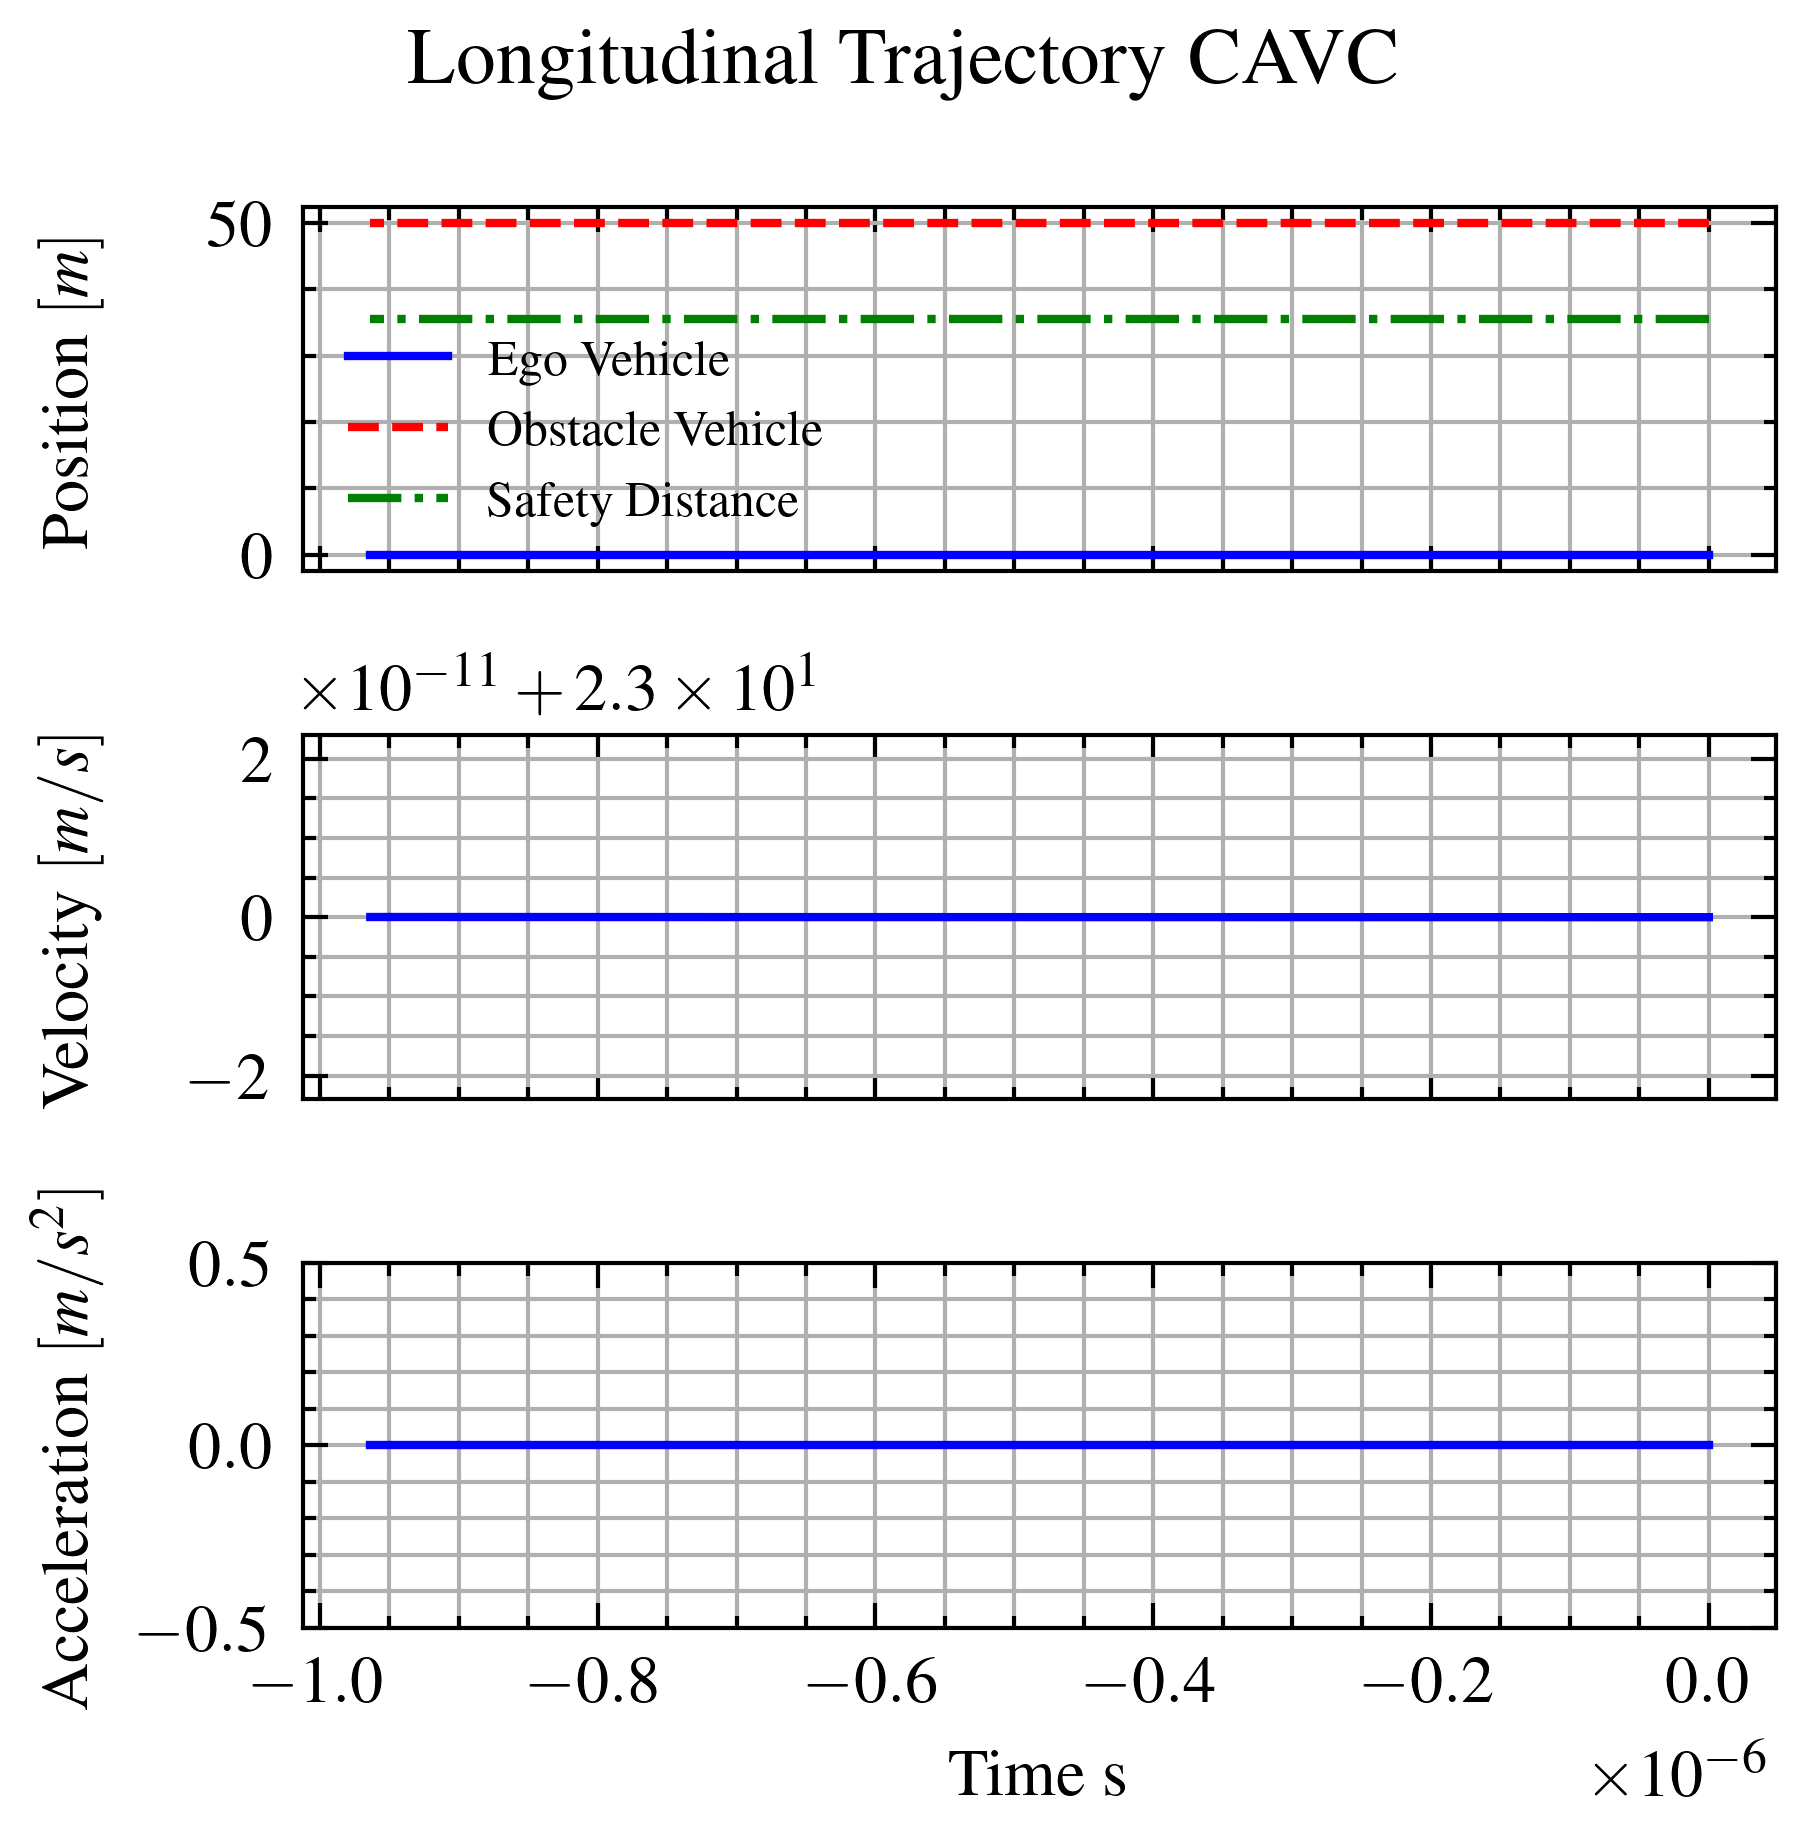

In [18]:
feasible, traj_cont = long_maneuver_continuous.compute_longitudinal_trajectory(obstacle=True, save_path=file_name)

if not feasible:
    warn("Trajectory Continuous is infeasible")

feasible, traj_disc = long_maneuver_discrete.compute_longitudinal_trajectory(obstacle=True)

if not feasible:
    warn("Trajectory Discrete is infeasible")

Print Results

In [19]:
tf = traj_cont['t'][-1]
print(tf)
print(traj_cont['v'][-1])

3.568425754302021
28.118886779015178


### 4. Relax Terminal Time and compute new trajectory

Ipopt 3.14.6: acceptable_obj_change_tol=1e-08
max_iter=10000
acceptable_tol=1e-08
print_level=3


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Total number of variables............................:     1805
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      601
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1604
Total number of inequality constraints...............:      201
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
    

Ipopt 3.14.6: acceptable_obj_change_tol=1e-08
max_iter=10000
acceptable_tol=1e-08
print_level=3


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Total number of variables............................:     1000
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      600
                     variables with only upper bounds:        0
Total number of equality constraints.................:      800
Total number of inequality constraints...............:      201
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
    

/home/aschavez/Drive/PhD/Research/CODES/CAV-Game/cav_game/maneuvers/selfish.py:208: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


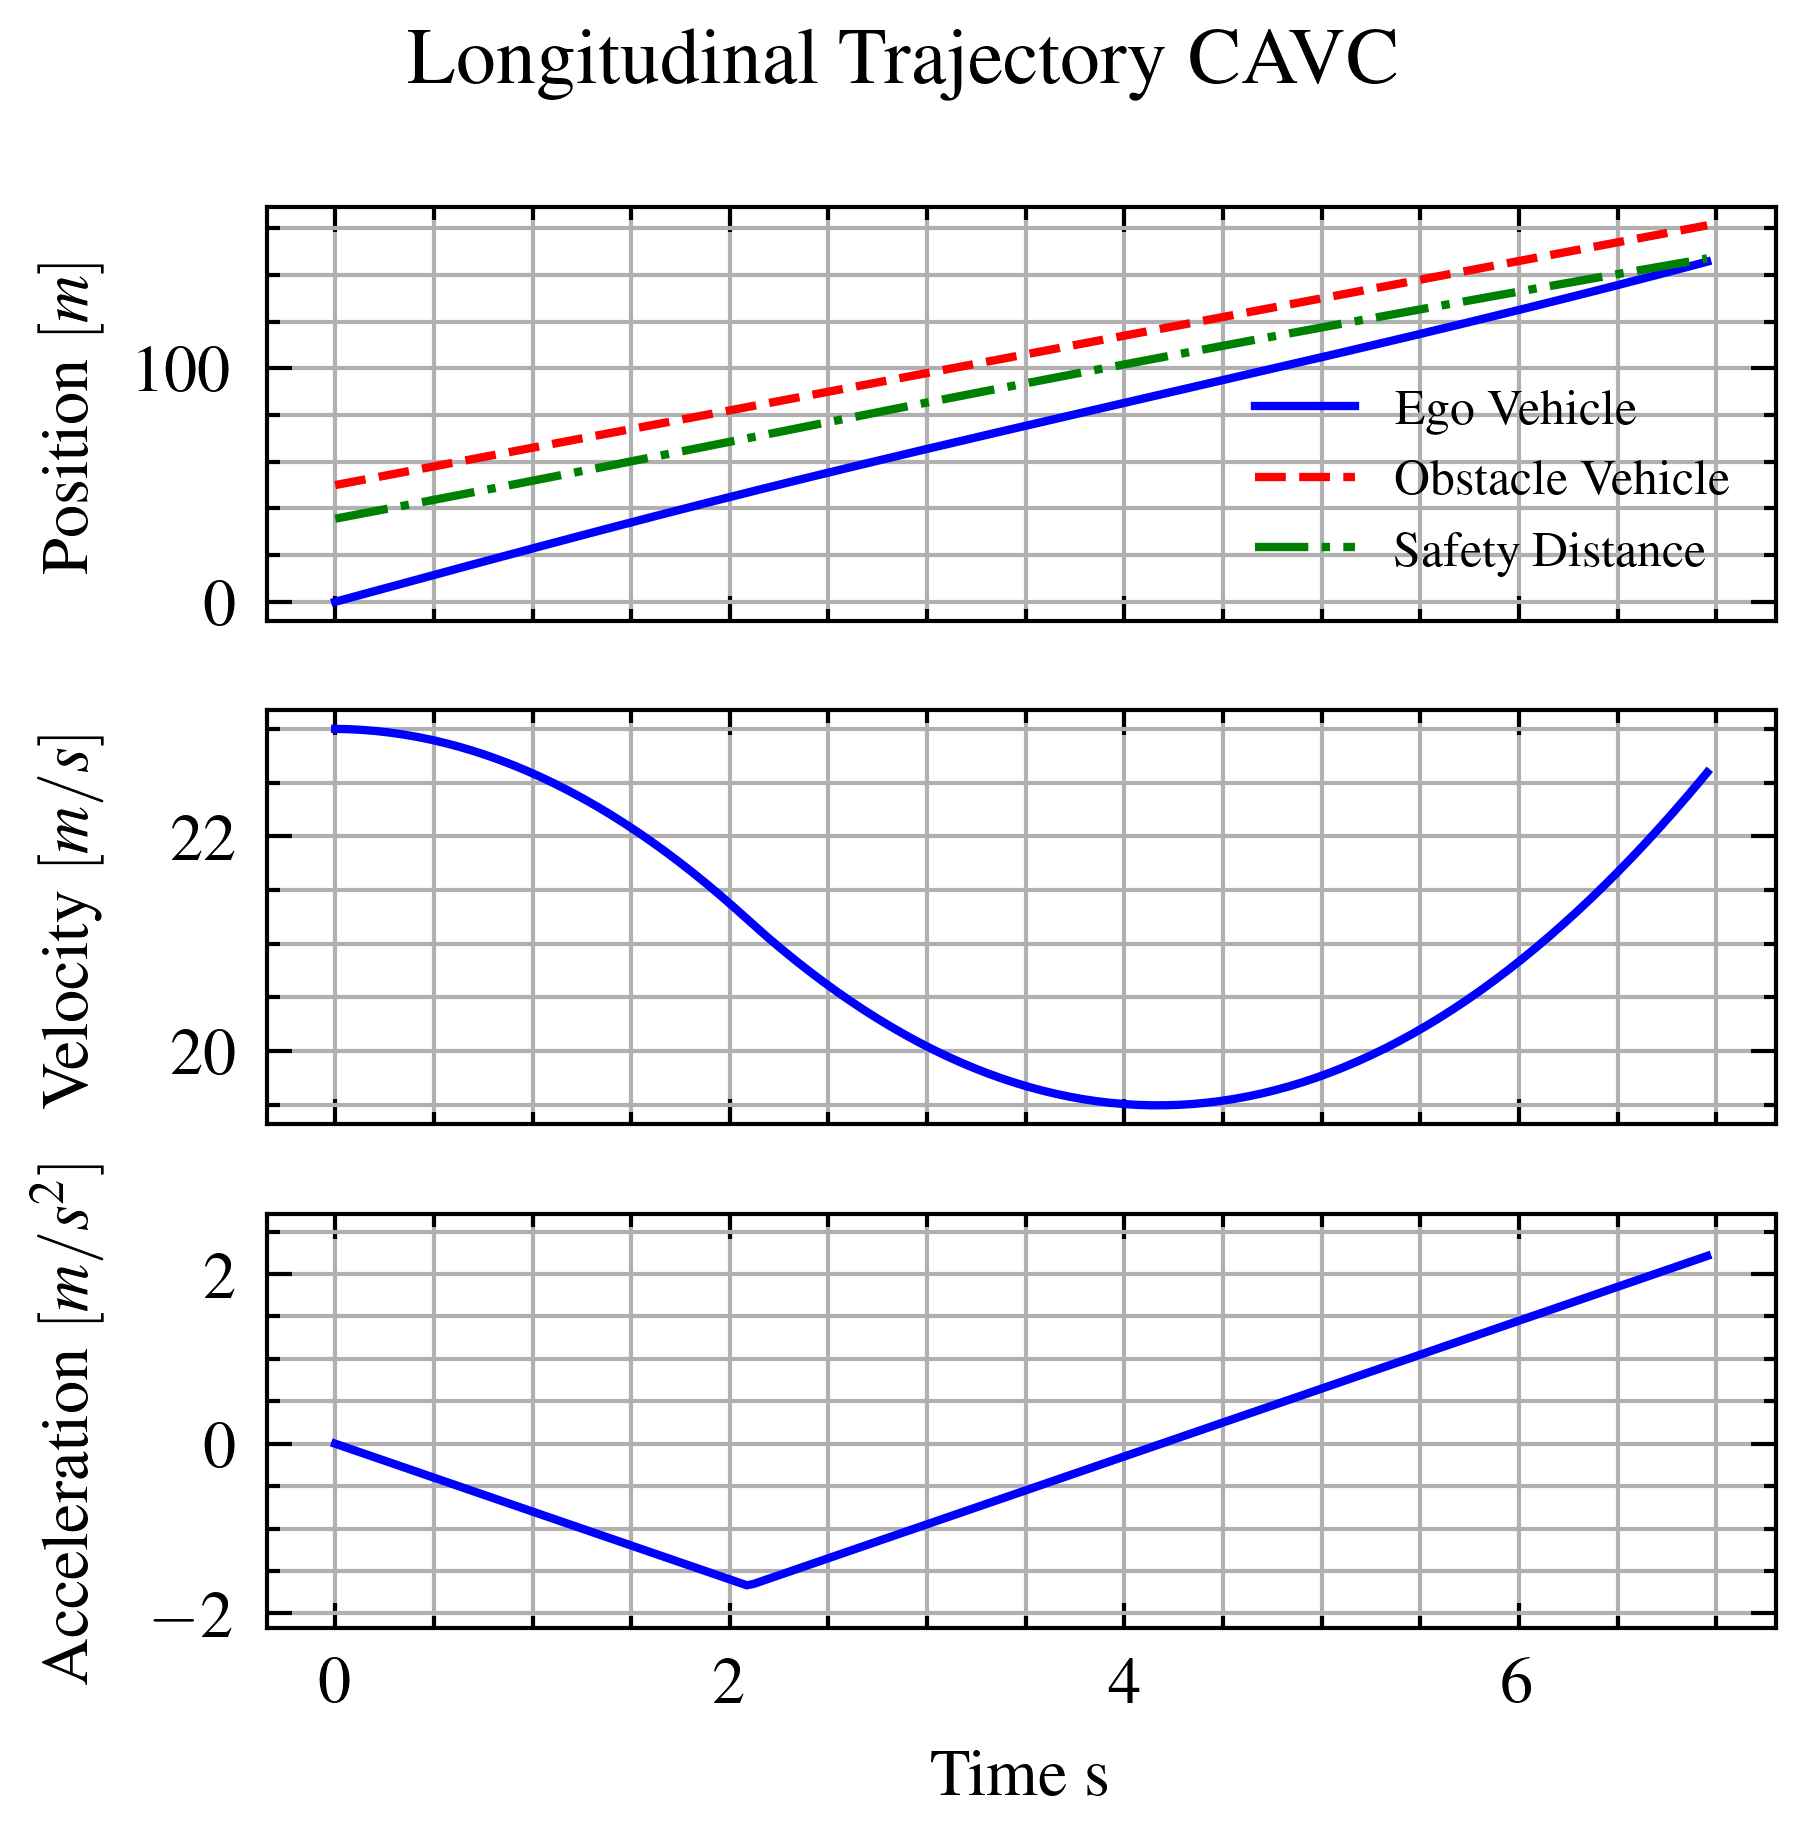

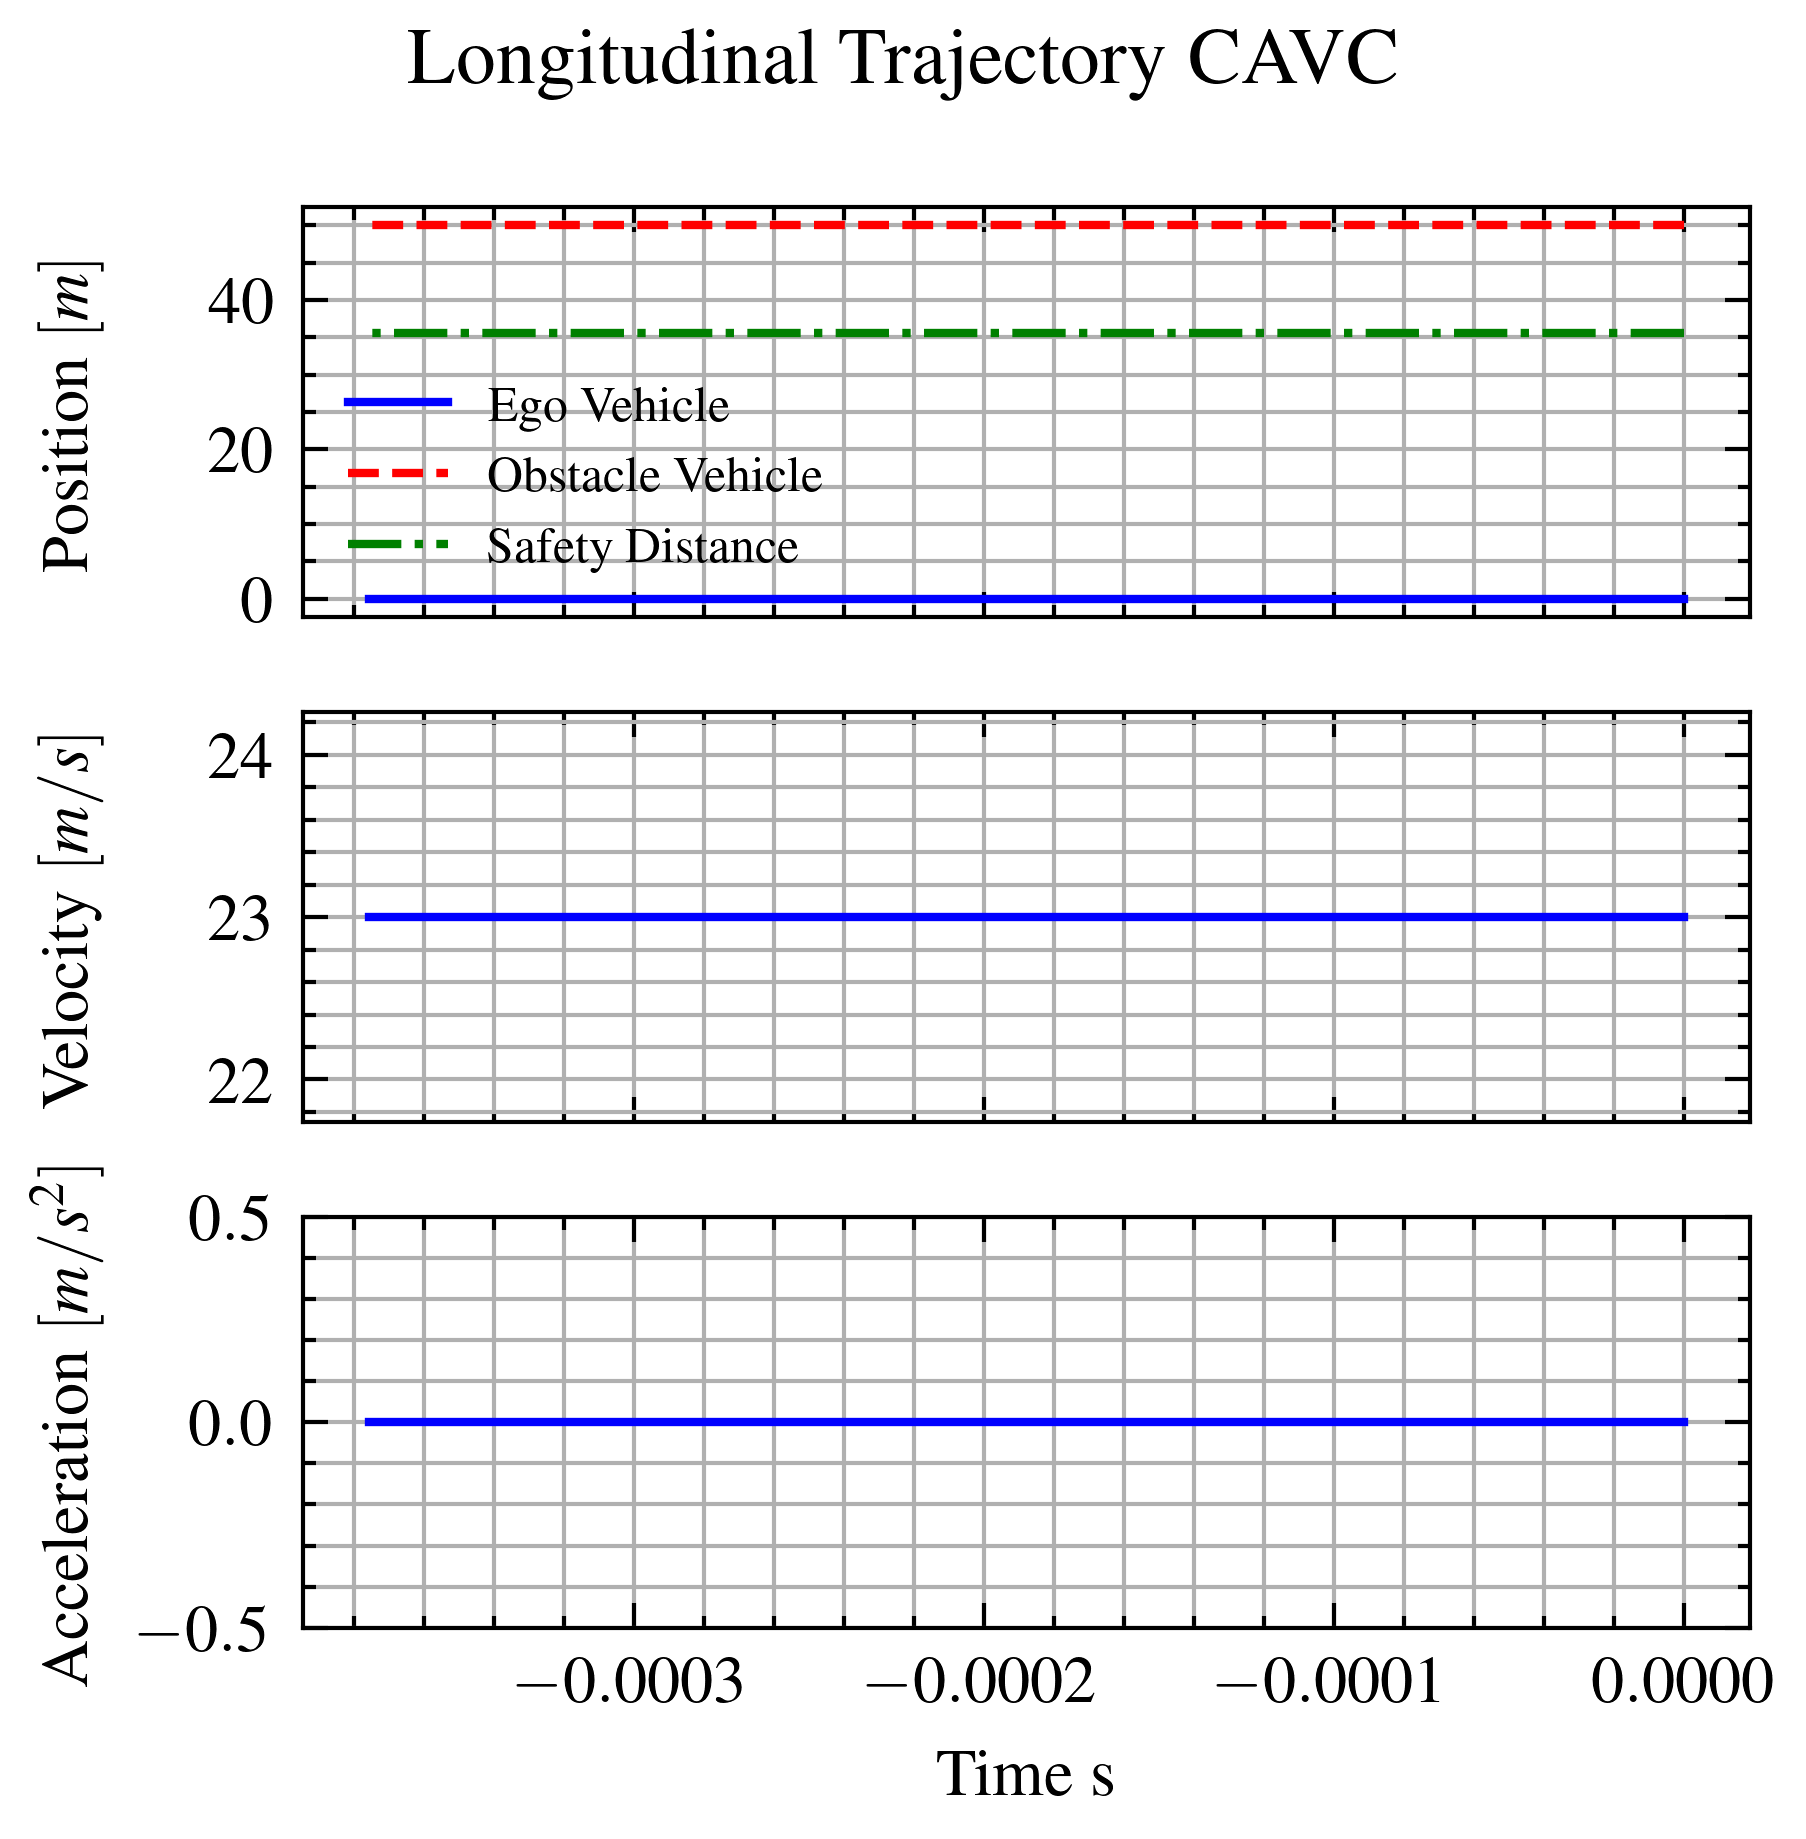

In [20]:
# Extract previous terminal time

file_name = ''
feasible, traj_cont = long_maneuver_continuous.relax_terminal_time(time=tf*(1.1**7),obstacle=True,save_path=file_name)
#
if not feasible:
    warn("Trajectory is infeasible")

tf = traj_disc['t'][-1]
feasible, traj = long_maneuver_discrete.relax_terminal_time(time=tf*(1.1**7),obstacle=True)
#
# if not feasible:
#     warn("Trajectory is infeasible")

In [21]:
tf = traj_cont['t'][-1]
print(tf)
print(traj_cont['v'][-1])

6.9538522874887505
22.59369622472941
